In [7]:
print("10 Academy week 0 challenge starter code")

10 Academy week 0 challenge starter code


In [8]:
import pandas as pd
df = pd.read_csv('../data/benin-malanville.csv')
summary = df.describe()
print(summary)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


## Data Cleaning

In [10]:

def data_clean(data):
    # Replace specific invalid numeric values and infinite values with NaN
    data = data.replace([-1, np.inf, -np.inf], np.nan)

    # Convert invalid or corrupt timestamps to NaN
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

    # Fill missing values in numeric columns with the respective column's mean
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    # Eliminate any duplicate rows from the dataset
    data.drop_duplicates(inplace=True)

    return data


## Data Analysis

In [11]:
def process_and_analyze(data, location_name, variables=None):
    """
    Processes and performs analysis on solar radiation data for a given location.

    Args:
        data (pandas.DataFrame): The dataset containing solar radiation measurements.
        location_name (str): The name of the location to be analyzed.
        variables (list, optional): A list of specific variable names for analysis.
            If not provided, all numeric columns are analyzed. Defaults to None.

    Returns:
        None
    """

    # Clean the dataset and handle missing values
    data = data_clean(data)

    if data.empty:
        print(f"No data available after cleaning for {location_name}.")
        return

    # Set the 'Timestamp' column as the index for time-series operations
    data.set_index('Timestamp', inplace=True)

    # Generate summary statistics for numerical columns
    summary_stats = data.describe(include=[np.number])
    print(f"\nSummary statistics for {location_name}:")
    print(summary_stats)

    # Analyze time-series patterns and trends
    if not variables:
        variables = ['GHI', 'DNI', 'DHI', 'Tamb']

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[variables])
    plt.title(f"Time-series trends for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

    # Perform correlation analysis between variables
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {location_name}")
    plt.show()

    # Create scatter plots to visualize relationships and detect anomalies
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='Tamb', y='GHI', hue='Precipitation', palette='viridis', s=20)
    plt.title(f"Scatter Plot of Tamb vs. GHI with Precipitation for {location_name}")
    plt.xlabel("Tamb (°C)")
    plt.ylabel("GHI (W/m²)")
    plt.show()

    # Use box plots to identify outliers and distribution spread
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[variables])
    plt.title(f"Box Plot for {location_name}")
    plt.show()

    # Plot a histogram to examine the distribution of GHI
    plt.figure(figsize=(12, 6))
    sns.histplot(data['GHI'], kde=True)
    plt.title(f"Histogram of GHI for {location_name}")
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Count")
    plt.show()

    # Report on any missing values after the cleaning and imputation process
    missing_values = data.isnull().sum()
    print(f"\nMissing values after cleaning and imputing for {location_name}:")
    print(missing_values)


In [12]:
# Load data from CSV files
try:
    benin_data = pd.read_csv("../data/benin-malanville.csv")
    sierra_leone_data = pd.read_csv("../data/sierraleone-bumbuna.csv")
    togo_data = pd.read_csv("../data/togo-dapaong_qc.csv")
except FileNotFoundError:
    print("Error: One or more CSV files not found.")
    exit()

## Apply the data analysis on each dataset


Summary statistics for Benin - Malanville:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      243.406679     169.419243     116.829589     236.589496   
std       330.091170     260.992408     158.150991     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.400000      -2.100000       0.000000   
50%         7.700000      -0.100000       7.800000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0

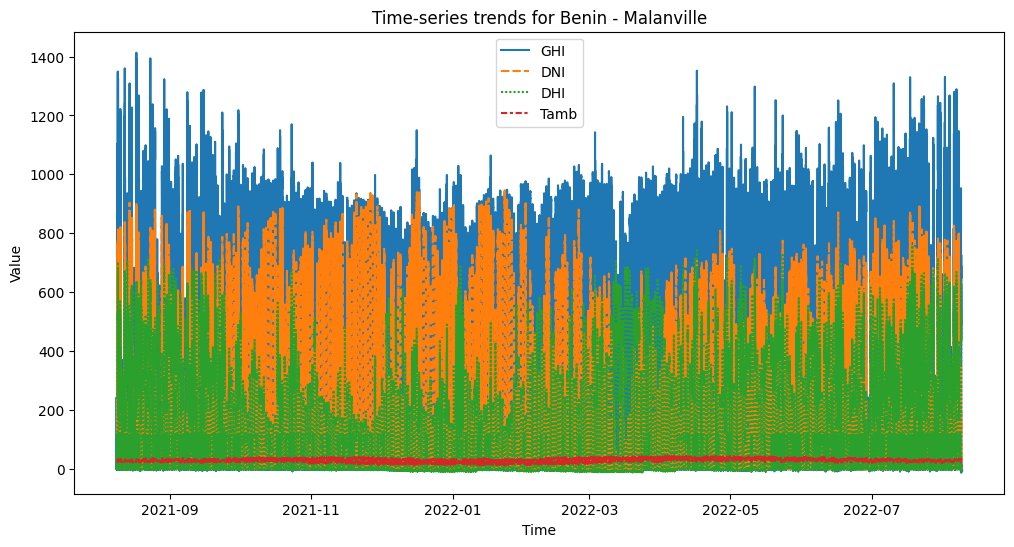

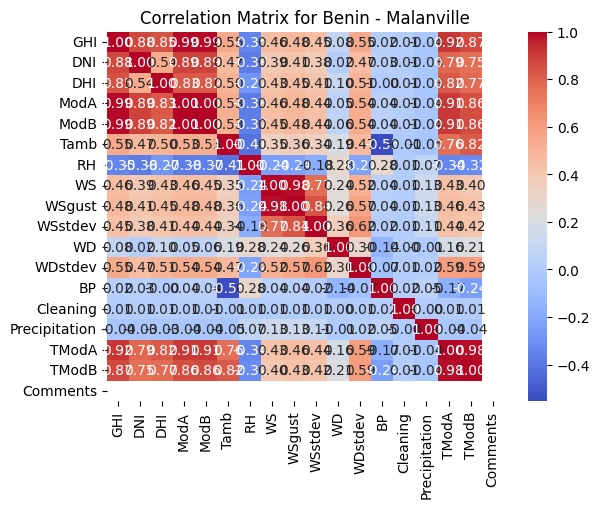

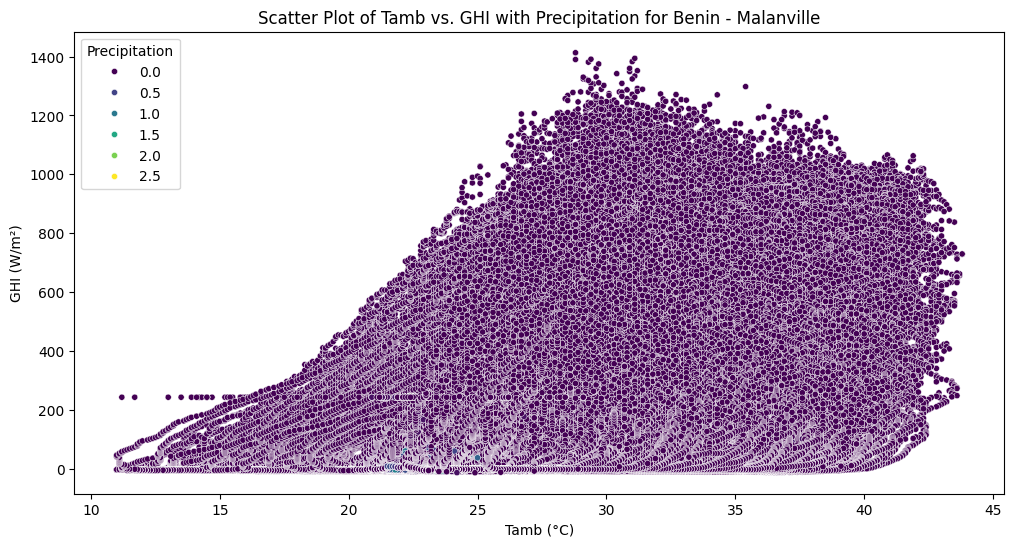

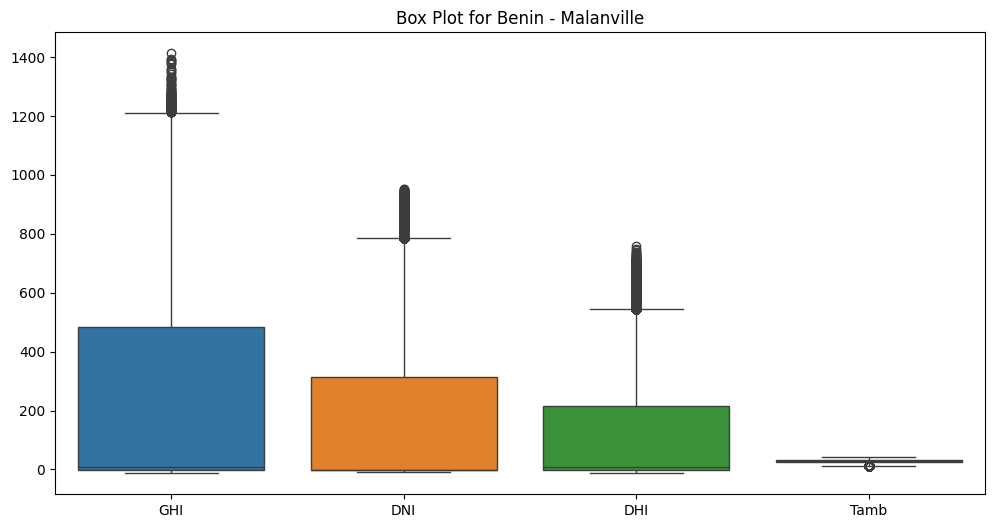

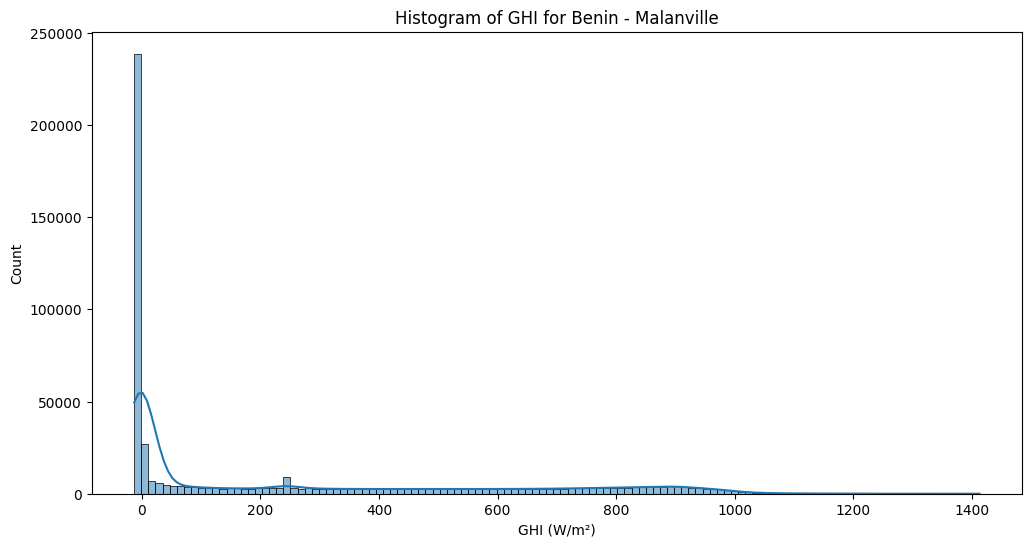


Missing values after cleaning and imputing for Benin - Malanville:
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [13]:

process_and_analyze(benin_data, "Benin - Malanville")


Summary statistics for Sierra Leone - Bunbuna:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      205.691410     116.538243     115.393618     206.643095   
std       297.223033     218.609197     158.341112     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         7.400000      -0.100000       4.900000       3.600000   
75%       362.400000     110.400000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000    

/home/bisry/Documents/projects/10academy/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


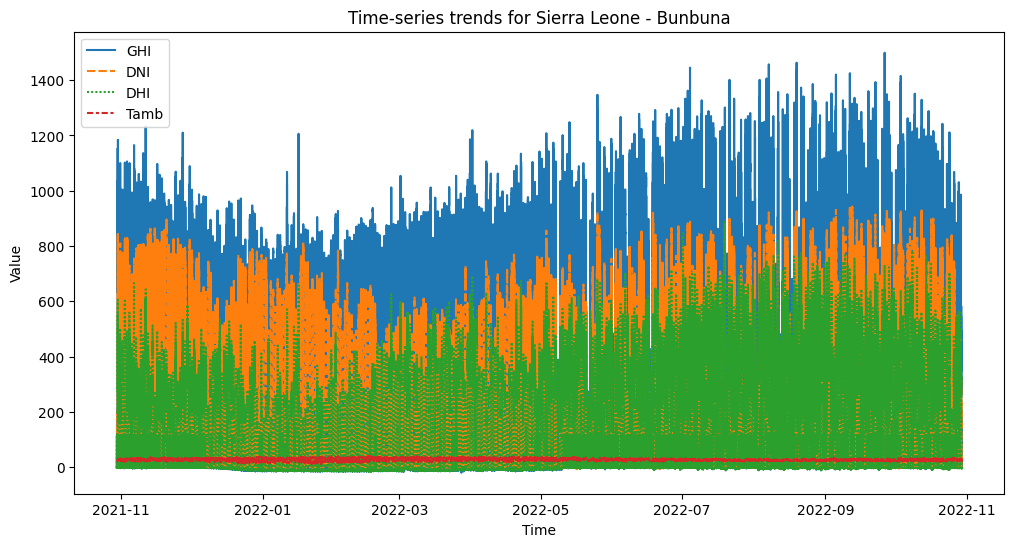

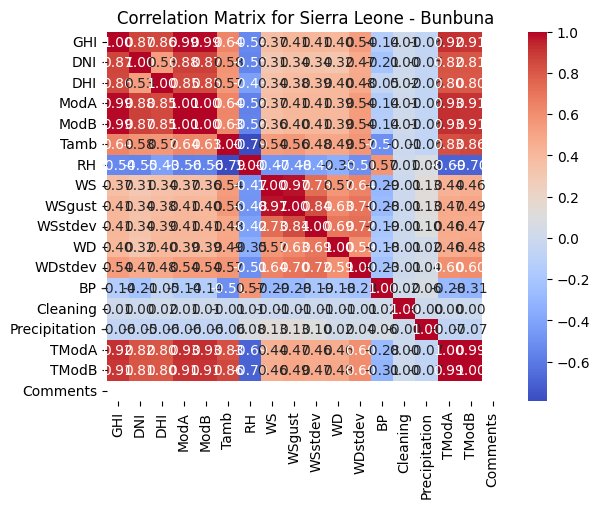

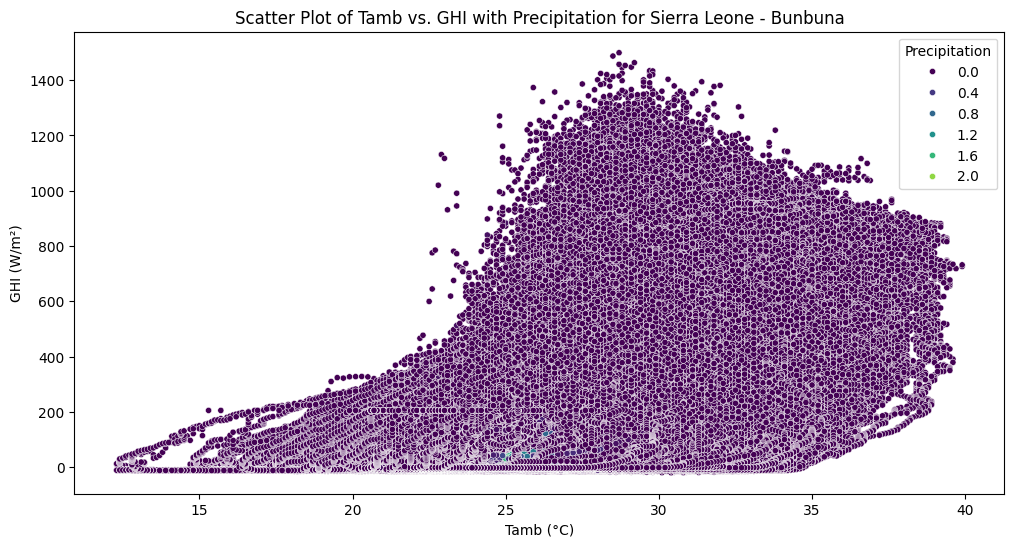

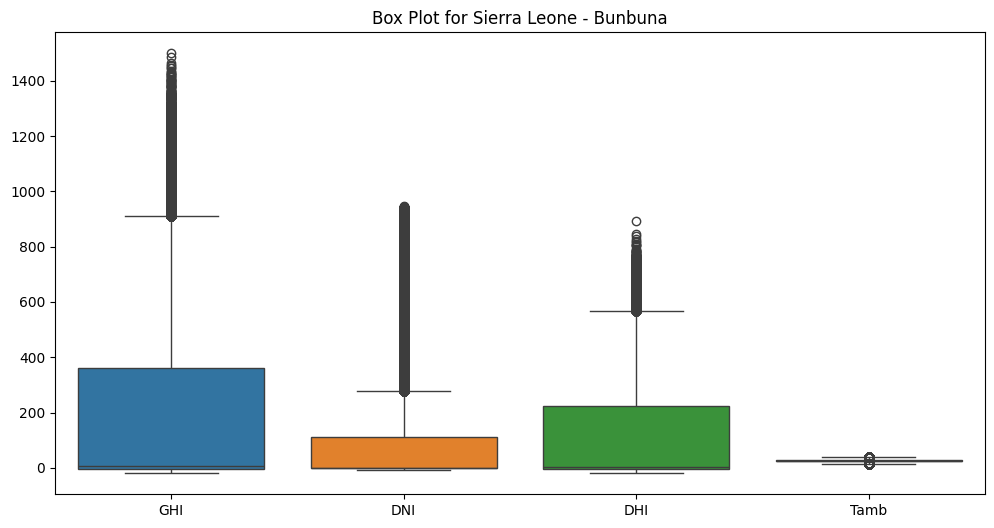

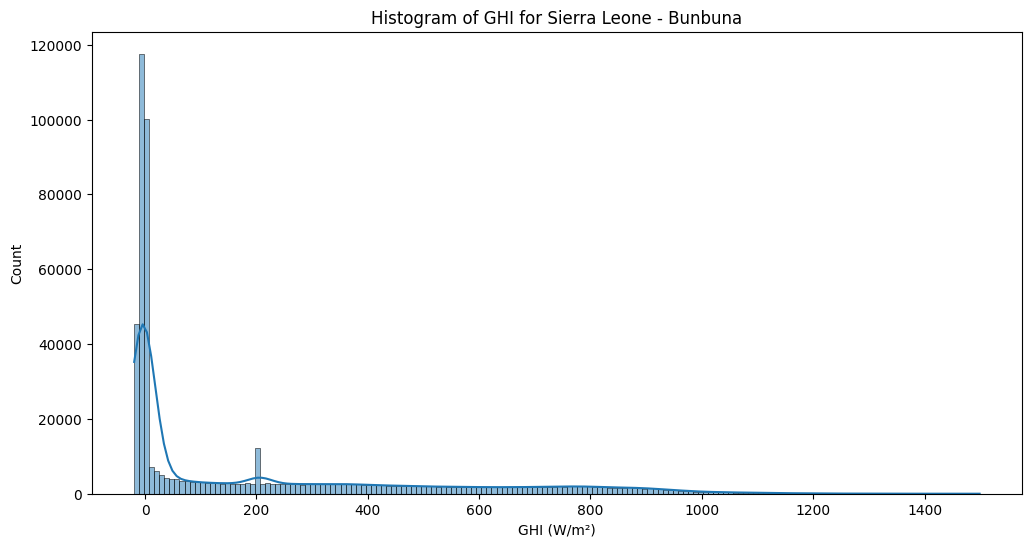


Missing values after cleaning and imputing for Sierra Leone - Bunbuna:
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [14]:

process_and_analyze(sierra_leone_data, "Sierra Leone - Bunbuna")


Summary statistics for Togo - Dapaong qc:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      233.237000     151.258469     116.444352     226.144375   
std       321.568176     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         7.700000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.

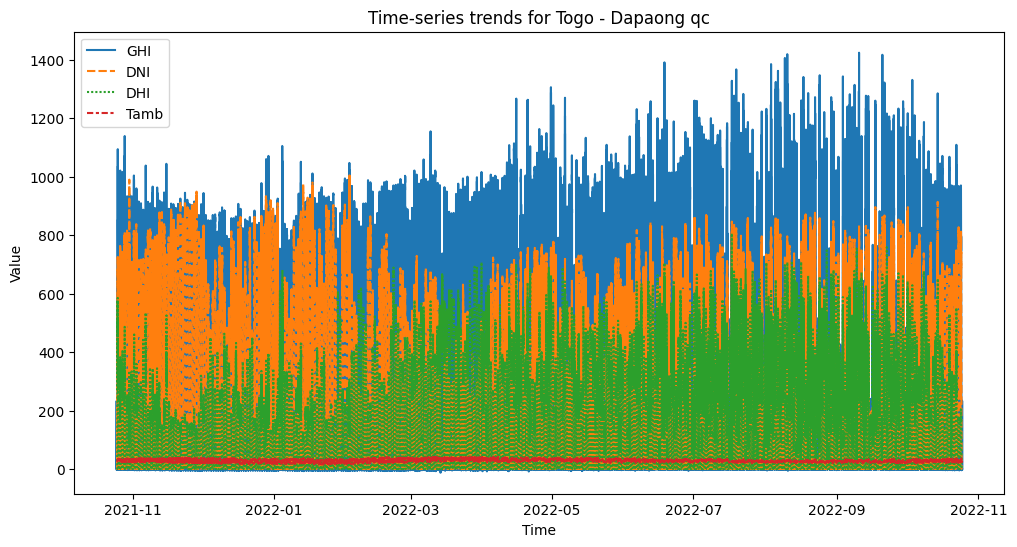

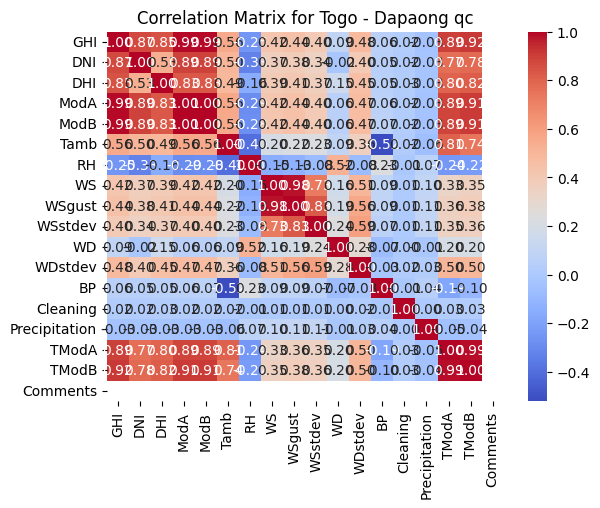

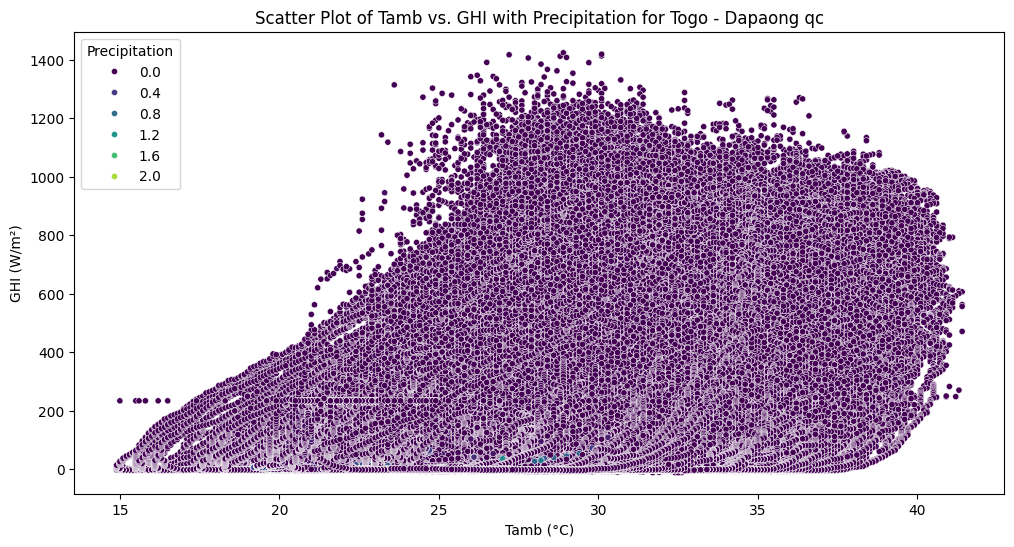

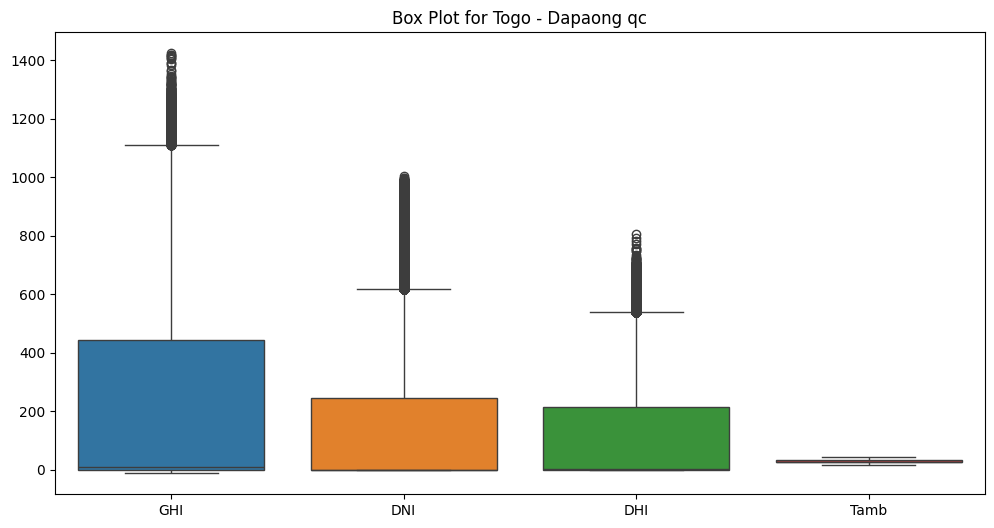

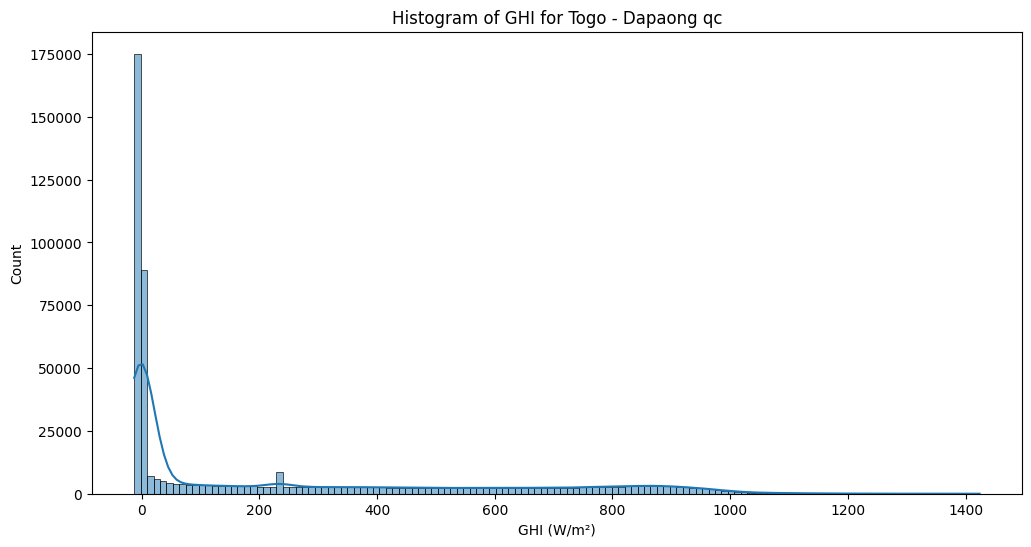


Missing values after cleaning and imputing for Togo - Dapaong qc:
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [15]:
process_and_analyze(togo_data, "Togo - Dapaong qc")
